<a href="https://colab.research.google.com/github/imnate/AI-Trainning/blob/master/%5BLecture3%5DOverfitting_Underfitting_and_Optimization_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 3: Overfitting, Underfitting and Optimization Techniques

### Please access this notebook at: https://github.com/sangaer/PracticalMachineLearning2019
### Once finished, please [Submit Your Colab Notebook Here](https://forms.gle/sXpcqjZG5ycv7uYe8)

#  
## recap for Lecture 2

## **Neural Network**
* Component must be differemtiable for optimization.
* Network weights should be initialize with non-symmetry values.




### **Loss Functions:**
#### For classification:
##### Cross Entropy:
### $$ cross\_entropy = -\frac{1}{m}\sum_{i=1}^{m}\sum_{c}^{C}y_{c}*log (y_{c\_predict}) $$
#### For Regression:
##### MSE(Mean Square Error):
## $$ MSE = \frac{1}{2m}\sum_{i=1}^{m}(y_{predict} - y)^2 $$



## **Activation Functions:**
### sigmoid:
## $$ sigmoid(x) = \frac{1}{1+e^{-x}} $$ 
#### $$ sigmoid(x)_j\in (0, 1) $$

### identity / linear
## $$ linear(x) = x $$
#### $$ linear(x)_j \in (-\infty, \infty) $$

### ReLU
## $$ 
ReLU(x) = \begin{cases}
        x,  & \text{for x >= 0}\\
        0, & \text{for x < 0}
        \end{cases} 
        $$
#### $$ ReLU(x)_j \in (0, \infty) $$


### Softmax
## $$ Softmax(x)_i = \frac {e^{x_i}}{\sum _j e^{x_j}} $$
#### $$ Softmax(x)_j \in (0, 1) $$
#### $$ \sum_{j}Softmax(x)_j = 1 $$

# Setting today's task:

In [5]:
# 1
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from IPython.display import clear_output
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# 2
def cross_entropy(predictions, targets, epsilon=1e-12):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray        
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    ce = - np.sum(np.multiply(np.log(predictions), targets)) / predictions.shape[0]
    return ce

In [0]:
# 3
FILE_TRAIN = 'sample_data/mnist_train_small.csv'
FILE_TEST = 'sample_data/mnist_test.csv'

df_train = pd.read_csv(FILE_TRAIN).sample(frac=1).reset_index(drop=True)
df_test = pd.read_csv(FILE_TEST).sample(frac=1).reset_index(drop=True)

x_normalizer = StandardScaler()
y_encoder = OneHotEncoder(categories='auto')

x_train = x_normalizer.fit_transform(df_train.iloc[:, 1:])
y_train = df_train.iloc[:, 0].values.reshape(-1, 1)
y_train_oh = y_encoder.fit_transform(y_train).toarray()

x_test = x_normalizer.transform(df_test.iloc[:, 1:])
y_test = df_test.iloc[:, 0].values.reshape(-1, 1)
y_test_oh = y_encoder.transform(y_test).toarray()

#  
# Overfitting and Underfitting
[wikipedia](https://en.wikipedia.org/wiki/Overfitting)

#### When fitting on training set:
![](https://drive.google.com/uc?id=1yAuC-Ky6UqMehA5heZ3py0c4I_AZo1Iy)

## Underfitting
#### How:
* Underfitting occurs when a statistical model or machine learning algorithm cannot adequately capture the underlying structure of the data. 
* It occurs when the model or algorithm does not fit the data enough. 
* It is often a result of an excessively simple model.

#### Solution:
* Try a more complex model.

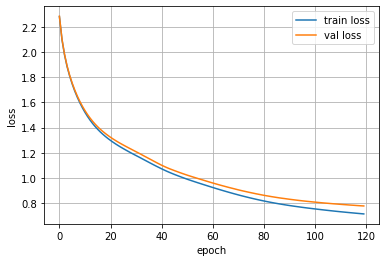

In [0]:
# 4
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_shape=(x_train.shape[1], ), activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(lr=1e-4)
loss = tf.keras.losses.sparse_categorical_crossentropy

model.compile(optimizer=optimizer,
              loss=loss)

train_losses = list()
val_losses = list()
for i in range(120):
    model.fit(x_train, 
              y_train, 
              verbose=0, 
              epochs=1, 
              validation_data=(x_test, y_test), 
              batch_size=256,
              shuffle=True)
    
    train_losses.append(cross_entropy(model.predict(x_train), y_train_oh))
    val_losses.append(cross_entropy(model.predict(x_test), y_test_oh))
    
    
    clear_output()    
    plt.plot(train_losses, label='train loss')
    plt.plot(val_losses, label='val loss')
    plt.legend(loc='best')
    plt.grid()
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

# Overfitting
#### How:
* The possibility of overfitting exists because the criterion used for selecting the model is not the same as the criterion used to judge the suitability of a model. 
* A model might be selected by maximizing its performance on some set of training data, and yet its suitability might be determined by its ability to perform well on unseen data
* Overfitting occurs when a model begins to "memorize" training data rather than "learning" to generalize from a trend.

#### Solution:
* Starts from simple.
* Try a simpler model when overfitting.
* Regularizaion (give constrain to limit the fitting ability for model).
* Ensemble.

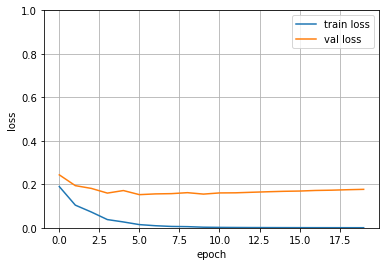

In [0]:
# 5
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2048, input_shape=(x_train.shape[1], ), activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(lr=1e-4)
loss = tf.keras.losses.sparse_categorical_crossentropy

model.compile(optimizer=optimizer,
              loss=loss)

train_losses = list()
val_losses = list()
for i in range(20):
    model.fit(x_train, 
              y_train, 
              verbose=0, 
              epochs=1, 
              validation_data=(x_test, y_test), 
              batch_size=256,
              shuffle=True)
    
    train_losses.append(cross_entropy(model.predict(x_train), y_train_oh))
    val_losses.append(cross_entropy(model.predict(x_test), y_test_oh))
    
    
    clear_output()    
    plt.plot(train_losses, label='train loss')
    plt.plot(val_losses, label='val loss')
    plt.legend(loc='best')
    plt.grid()
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.ylim([0, 1])
    plt.show()

## Try a simpler model

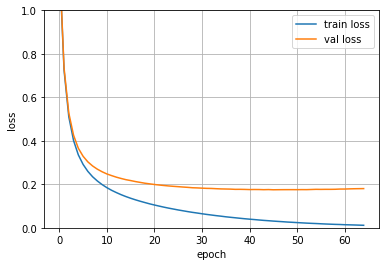

KeyboardInterrupt: ignored

In [0]:
# 6
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(x_train.shape[1], ), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(lr=1e-4)
loss = tf.keras.losses.sparse_categorical_crossentropy

model.compile(optimizer=optimizer,
              loss=loss)

train_losses = list()
val_losses = list()
for i in range(120):
    model.fit(x_train, 
              y_train, 
              verbose=0, 
              epochs=1, 
              validation_data=(x_test, y_test), 
              batch_size=256,
              shuffle=True)
    
    train_losses.append(cross_entropy(model.predict(x_train), y_train_oh))
    val_losses.append(cross_entropy(model.predict(x_test), y_test_oh))
    
    
    clear_output()    
    plt.plot(train_losses, label='train loss')
    plt.plot(val_losses, label='val loss')
    plt.legend(loc='best')
    plt.grid()
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.ylim([0, 1])
    plt.show()

## Ensemble
* Inference the final result by aggregate the inference from multiple models.

### $$ prediction = aggregation (model1(x), model2(x), model3(x), ...) $$

## Dropout (for Neural Networks)
[reference](http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

![](https://drive.google.com/uc?id=19O_lTVcOjH1aQRqJRmaKzNoTKglG5rmz)
#### For training:
* Random drop neurons out by predefined rate. 

#### For prediction
* Weight neuron values by dropout rate in training. 


#### NOTE:
* Usually we will not apply dropout before first layer as it will drop input feature directly.



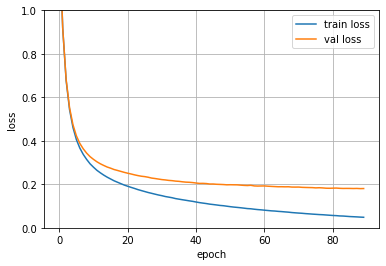

KeyboardInterrupt: ignored

In [0]:
# 7
DROP_RATE = 0.3

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(x_train.shape[1], ), activation='relu'),
    tf.keras.layers.Dropout(DROP_RATE),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(DROP_RATE),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(lr=1e-4)
loss = tf.keras.losses.sparse_categorical_crossentropy

model.compile(optimizer=optimizer,
              loss=loss)

train_losses = list()
val_losses = list()
for i in range(120):
    model.fit(x_train, 
              y_train, 
              verbose=0, 
              epochs=1, 
              validation_data=(x_test, y_test), 
              batch_size=256,
              shuffle=True)
    
    train_losses.append(cross_entropy(model.predict(x_train), y_train_oh))
    val_losses.append(cross_entropy(model.predict(x_test), y_test_oh))
    
    
    clear_output()
    
    plt.plot(train_losses, label='train loss')
    plt.plot(val_losses, label='val loss')
    plt.legend(loc='best')
    plt.grid()
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.ylim([0, 1])
    plt.show()

##  
## L2 Regularization

## $$ loss ← loss + \lambda \sum_{}|W|^2 $$

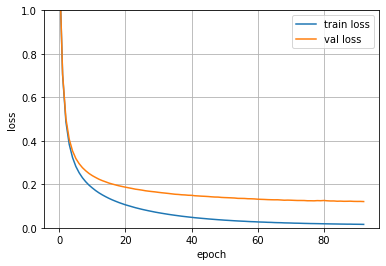

KeyboardInterrupt: ignored

In [0]:
# 8
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(x_train.shape[1], ), 
                          activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)
                         ),
    tf.keras.layers.Dense(64, 
                          activation='relu',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(lr=1e-4)
loss = tf.keras.losses.sparse_categorical_crossentropy

model.compile(optimizer=optimizer,
              loss=loss)

train_losses = list()
val_losses = list()
for i in range(120):
    model.fit(x_train, 
              y_train, 
              verbose=0, 
              epochs=1, 
              validation_data=(x_test, y_test), 
              batch_size=256,
              shuffle=True)
    
    train_losses.append(cross_entropy(model.predict(x_train), y_train_oh))
    val_losses.append(cross_entropy(model.predict(x_test), y_test_oh))
    
    
    clear_output()    
    plt.plot(train_losses, label='train loss')
    plt.plot(val_losses, label='val loss')
    plt.legend(loc='best')
    plt.grid()
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.ylim([0, 1])
    plt.show()

##  
## L1 Regularization

## $$ loss ← loss + \lambda \sum_{}|W| $$

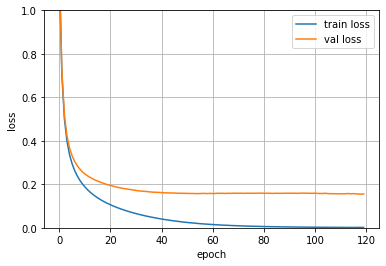

In [19]:
# 9
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(x_train.shape[1], ), 
                          activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l1(1e-5)
                         ),
    tf.keras.layers.Dense(64, 
                          activation='relu',
                         kernel_regularizer=tf.keras.regularizers.l1(1e-5)),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(lr=1e-4)
loss = tf.keras.losses.sparse_categorical_crossentropy

model.compile(optimizer=optimizer,
              loss=loss)

train_losses = list()
val_losses = list()
for i in range(120):
    model.fit(x_train, 
              y_train, 
              verbose=0, 
              epochs=1, 
              validation_data=(x_test, y_test), 
              batch_size=256,
              shuffle=True)
    
    train_losses.append(cross_entropy(model.predict(x_train), y_train_oh))
    val_losses.append(cross_entropy(model.predict(x_test), y_test_oh))
    
    
    clear_output()    
    plt.plot(train_losses, label='train loss')
    plt.plot(val_losses, label='val loss')
    plt.legend(loc='best')
    plt.grid()
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.ylim([0, 1])
    plt.show()

##  
## Early Stopping

* Stop training when validation result converages.

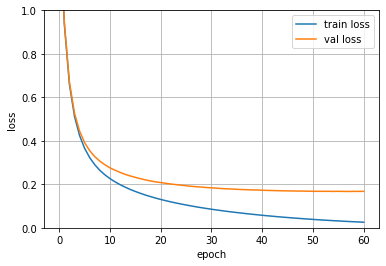

Early stop at 60th iteration as val loss was not improved for 3 epoch


In [20]:
# 10
EARLY_STOP_IF_N_EPOCHS_NOT_IMPROVE = 3

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(x_train.shape[1], ), activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(lr=1e-4)
loss = tf.keras.losses.sparse_categorical_crossentropy

model.compile(optimizer=optimizer,
              loss=loss)

train_losses = list()
val_losses = list()
for i in range(1000):
    model.fit(x_train, 
              y_train, 
              verbose=0, 
              epochs=1, 
              validation_data=(x_test, y_test), 
              batch_size=256,
              shuffle=True)
    
    train_losses.append(cross_entropy(model.predict(x_train), y_train_oh))
    val_losses.append(cross_entropy(model.predict(x_test), y_test_oh))

    clear_output()    
    plt.plot(train_losses, label='train loss')
    plt.plot(val_losses, label='val loss')
    plt.legend(loc='best')
    plt.grid()
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.ylim([0, 1])
    plt.show()
    
    
    if (len(val_losses) > EARLY_STOP_IF_N_EPOCHS_NOT_IMPROVE) and (np.argmin(val_losses[-(EARLY_STOP_IF_N_EPOCHS_NOT_IMPROVE+1):])==0):
        print('Early stop at {}th iteration as val loss was not improved for {} epoch'.format(
            i,
            EARLY_STOP_IF_N_EPOCHS_NOT_IMPROVE
        ))
        break

### Apply early stop as [keras callback function](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback).

In [21]:
# 11
EARLY_STOP_IF_N_EPOCHS_NOT_IMPROVE = 3

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(x_train.shape[1], ), activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(lr=1e-4)
loss = tf.keras.losses.sparse_categorical_crossentropy

model.compile(optimizer=optimizer,
              loss=loss)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=EARLY_STOP_IF_N_EPOCHS_NOT_IMPROVE+1, min_delta=1e-20)
model.fit(x_train, y_train, epochs=1000, callbacks=[callback], validation_data=(x_test, y_test), verbose=1)

Train on 19999 samples, validate on 9999 samples
Epoch 1/1000
19999/19999 [==============================] - 2s 106us/sample - loss: 1.0514 - val_loss: 0.5261
Epoch 2/1000
19999/19999 [==============================] - 2s 95us/sample - loss: 0.3941 - val_loss: 0.3420
Epoch 3/1000
19999/19999 [==============================] - 2s 93us/sample - loss: 0.2724 - val_loss: 0.2804
Epoch 4/1000
19999/19999 [==============================] - 2s 96us/sample - loss: 0.2138 - val_loss: 0.2443
Epoch 5/1000
19999/19999 [==============================] - 2s 96us/sample - loss: 0.1766 - val_loss: 0.2262
Epoch 6/1000
19999/19999 [==============================] - 2s 98us/sample - loss: 0.1503 - val_loss: 0.2132
Epoch 7/1000
19999/19999 [==============================] - 2s 101us/sample - loss: 0.1295 - val_loss: 0.2031
Epoch 8/1000
19999/19999 [==============================] - 2s 99us/sample - loss: 0.1133 - val_loss: 0.1958
Epoch 9/1000
19999/19999 [==============================] - 2s 99us/sample - 

#  
### Score(1/2)

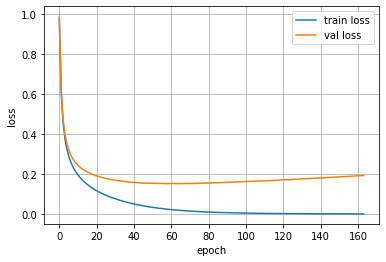

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None
Early stop at 163th iteration as val loss was not improved for 100 epoch


In [22]:
# 12
train_losses = list()
val_losses = list()

# ↓↓↓↓↓↓↓↓↓↓↓↓↓ You can modify this block for better learning curve. ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

EARLY_STOP_IF_N_EPOCHS_NOT_IMPROVE = 100
print((x_train.shape[1], ))
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_shape=(x_train.shape[1], ),kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(10,kernel_initializer='normal', activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(lr=1e-4)
loss = tf.keras.losses.sparse_categorical_crossentropy

model.compile(optimizer=optimizer,
              loss=loss)


for i in range(300):
    model.fit(x_train, 
              y_train, 
              verbose=0, 
              epochs=1, 
              validation_data=(x_test, y_test), 
              batch_size=256,
              shuffle=True)

# ↑↑↑↑↑↑↑↑↑↑↑↑↑ You can modify this block for better learning curve. ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑

    train_losses.append(cross_entropy(model.predict(x_train), y_train_oh))
    val_losses.append(cross_entropy(model.predict(x_test), y_test_oh))

    clear_output()    
    plt.plot(train_losses, label='train loss')
    plt.plot(val_losses, label='val loss')
    plt.legend(loc='best')
    plt.grid()
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    
    print(model.summary())
    if (len(val_losses) > EARLY_STOP_IF_N_EPOCHS_NOT_IMPROVE) and (np.argmin(val_losses[-(EARLY_STOP_IF_N_EPOCHS_NOT_IMPROVE+1):])==0):
        print('Early stop at {}th iteration as val loss was not improved for {} epoch'.format(
            i,
            EARLY_STOP_IF_N_EPOCHS_NOT_IMPROVE
        ))
        break

#  
# Parameter Search

In [0]:
# 13
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

from copy import copy
from itertools import product
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

##  
## Grid Search
* search for the predefined meta-parameter from predefined searching space(s)/

In [0]:
# 14
x_valid = copy(x_test)
y_valid = copy(y_test)

In [25]:
# 15
best_validation = 0
best_model = None


penalty_space = ['l1', 'l2']
lr_space = [0.01, 0.03, 0.1, 0.3, 1]

for penalty, lr in product(penalty_space, lr_space):
    model = SGDClassifier(eta0=lr, max_iter=10, penalty=penalty)
    model.fit(x_train, y_train.reshape(-1))
    accuracy = accuracy_score(model.predict(x_valid), y_valid.reshape(-1))
    
    print('val accuracy: {} with penalty:{}, lr: {}'.format(accuracy, penalty, lr))
    if best_validation < accuracy:
        best_model = model
        best_validation = accuracy

print('\n----\nSearched best val accuracy: {:.4f} as model : {}'.format(best_validation, best_model))

val accuracy: 0.9015901590159016 with penalty:l1, lr: 0.01
val accuracy: 0.903990399039904 with penalty:l1, lr: 0.03
val accuracy: 0.9020902090209021 with penalty:l1, lr: 0.1
val accuracy: 0.9014901490149015 with penalty:l1, lr: 0.3
val accuracy: 0.9043904390439044 with penalty:l1, lr: 1
val accuracy: 0.9088908890889089 with penalty:l2, lr: 0.01
val accuracy: 0.9091909190919092 with penalty:l2, lr: 0.03
val accuracy: 0.9102910291029103 with penalty:l2, lr: 0.1
val accuracy: 0.9092909290929093 with penalty:l2, lr: 0.3
val accuracy: 0.9104910491049105 with penalty:l2, lr: 1

----
Searched best val accuracy: 0.9105 as model : SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              val

##  
## Cross Validation
[sklearn document](https://scikit-learn.org/stable/modules/cross_validation.html)

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [26]:
penalty_space = ['l1', 'l2']
lr_space = [0.01, 0.03, 0.1, 0.3, 1]
model = SGDClassifier(max_iter=10)# 16
lr = best_model.eta0
model = SGDClassifier(eta0=lr, max_iter=10, penalty=penalty)
val_accuracies = cross_val_score(model, x_train, y_train.reshape(-1), cv=5)
mean_val_accuracy = np.mean(val_accuracies)
print('mean_val_accuracy: {:.4f}'.format(mean_val_accuracy))

mean_val_accuracy: 0.9052


##  
## [Grid Search with Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

#### Define the Grid Search CV classifier

In [0]:
# 17
penalty_space = ['l1', 'l2']
lr_space = [0.01, 0.03, 0.1, 0.3, 1]
model = SGDClassifier(max_iter=10)

param_grid = {'eta0': lr_space, 'penalty': penalty_space}
clf = GridSearchCV(model, param_grid, n_jobs=-1, cv=5)

#### Fit as normal clf

In [28]:
# 18
clf.fit(x_train, y_train.reshape(-1))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=10,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'eta0': [0.01, 0.03, 0.1, 0.3, 1],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

#### Evaluate as normal clf

In [29]:
# 19
y_predict = clf.predict(x_test)
accuracy_score(y_predict, y_test.reshape(-1))

0.9088908890889089

##  
### Score(2/2)

In [31]:
# 20
# ↓↓↓↓↓↓↓↓↓↓↓↓↓ You can modify this block for better learning curve. ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
penalty_space = ['l1', 'l2']
lr_space = [0.01, 0.03, 0.1, 0.3, 1]
model = SGDClassifier(max_iter=10)
param_grid = {'eta0': lr_space, 'penalty': penalty_space}
clf = GridSearchCV(model, param_grid, n_jobs=-1, cv=5)
clf.fit(x_train, y_train.reshape(-1))
# ↑↑↑↑↑↑↑↑↑↑↑↑↑ You can modify this block for better learning curve. ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑

y_predict = clf.predict(x_test)
accuracy_score(y_predict, y_test.reshape(-1))

0.90999099909991

###  
#### For more search algorithmns, please search for:
* Random Hyperparameter Search
* Bayesian Hyperparameter Search

#  
### Once finished, please [Submit Your Colab Notebook Here](https://forms.gle/sXpcqjZG5ycv7uYe8)

### For next week(17, Dec, 2019), Jessee will introduce more Neural Network architecture for solving more general data formats.

In [0]:
!date +%Y%m%d_%H%M%S